In [83]:
# Remember to update your path
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/home/rz14/Documents/QR_Qishi/QishiQR/')

from pathlib import Path

from Backtesting.Vectorized.cross_compare import *

from Utils.lm import gen_strategy, LM_model

import json
import warnings
warnings.filterwarnings(action='ignore')

# ====== Initial Configuration ========

try:
    with open('config.json','r') as f:
        config = json.load(f)
except:
    print("Failed to find the configuration file.")
        
DATA_DIR = config['Tick path']
OUTPUT_DIR = config['Output path']
Strategy_DIR = config['Strategy path']

model_order = config['Max model order']
number_of_states = config['State number']
freq = config['Frequency']
offset = config['Offset']
tca = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Build Strategy

In [100]:
ASSET = 'Ag'
ASSET_PATH = Path(config['Output path'], ASSET)
ASSET_PATH.mkdir(exist_ok=True, parents=True)

commodity = ASSET
exp_list = ['1601', '1602', '1603', '1604', '1605', '1606', '1607', '1608', '1609', '1610', '1611', '1612', '1701',
                '1702', '1703', '1704', '1705', '1706', '1707', '1708', '1709', '1710', '1711', '1712']



# === Main Routine ===
try:
    strategy = pd.read_csv('../../Strategy/{}_5min_Stra.csv'.format(ASSET))
    slm = strategy[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index()
    slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
except:
    strategy = gen_strategy(commodity, exp_list, number_of_states, model_order, data_root_dir=DATA_DIR, output=OUTPUT_DIR)
    strategy.to_csv('../../Strategy/{}_5min_Stra.csv'.format(ASSET),index=False)
    slm = strategy[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index()
    slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)

# Validate

In [55]:
import pandas as pd
from Backtesting.Vectorized.lm_validation import LmValidation

lm_validation = LmValidation(slm, symbol='ag1701*', data_dir=r'../../Output', valid_dir=r'../../Validation', max_order=8)
lm_validation.run()

# Test one contract

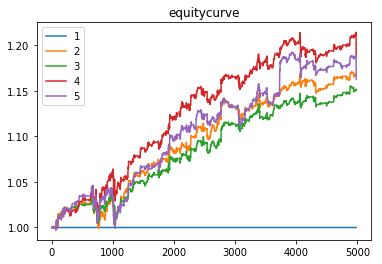

In [87]:
from Backtesting.Vectorized.models import OneContractTest
start = '20161101'
end = '20161231'
max_order=5
test1 = OneContractTest(DATA_DIR, OUTPUT_DIR, slm)
test1.build('ag', '1701', max_order, freq, offset, start, end, None)
test1.run()
test1.plot()

# Compare different contracts

In [90]:
from Backtesting.Vectorized.models import MultiContractTest
start = '20161101'
end = '20161231'
exps=['1701','1702', '1703', '1704', '1705', '1706', '1707', '1708', '1709', '1710', '1711', '1712']
tca = ['Fixed']*len(exps)
test2 = MultiContractTest(DATA_DIR, OUTPUT_DIR, slm)
test2.build('ag', exps, 4, freq, offset, start, end, tca)
test2.run()



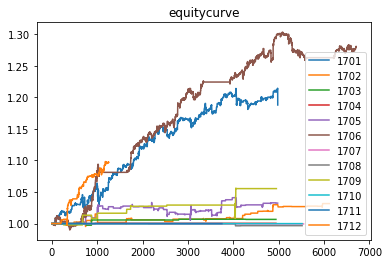

In [92]:
test2.plot()
plt.legend(exps)

In [98]:
test2.performance.index=exps
test2.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
1701,0.127976,0.003543,-0.001705,0.001007,0.000098,-0.026554,0.007252,-0.032964,0.590491,6.920487,1923,1.187759,0.408736
1702,0.037228,0.000598,-0.002153,0.001751,0.000132,-0.013354,0.006990,-0.015574,0.813378,4.015905,241,1.031695,0.161826
1703,0.019038,0.000126,-0.001009,0.004852,0.000215,-0.002541,0.008491,-0.002541,4.810023,1.654559,31,1.006678,0.064516
1704,0.001008,0.000009,NaN,0.000460,0.000057,0.000000,0.000460,0.000000,NaN,2.192645,8,1.000460,0.125000
1705,0.083254,0.000624,-0.002228,0.002036,0.000087,-0.014566,0.016091,-0.027269,0.913512,1.872528,371,1.032426,0.169811
1706,0.177522,0.005384,-0.001368,0.000810,0.000104,-0.016249,0.021763,-0.034157,0.591555,7.582274,2689,1.279973,0.520268
1707,0.001057,-0.000009,-0.000482,NaN,-0.000054,-0.000482,0.000000,-0.000482,NaN,-2.192645,9,0.999518,0.000000
1708,0.007644,-0.000062,-0.003506,0.000245,-0.000163,-0.003506,0.000245,-0.003506,0.069794,-2.012689,20,0.996739,0.050000
1709,0.070743,0.001066,-0.002213,0.005625,0.000710,-0.005638,0.015337,-0.023014,2.541714,3.766129,78,1.055417,0.166667
1710,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,5,1.000000,0.000000
